<a href="https://colab.research.google.com/github/Ruchikkale09/Normal-Distribution-and-Z-Score/blob/main/%20Exercise/outlier_using_standard_deviation_and_zscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise: Outlier removal using standard deviation and z score**

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/'


Mounted at /content/drive


In [5]:
df = pd.read_csv(path+'bhn.csv', encoding = 'latin-1')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


##We will quickly examine price column to check min,max,mean and percentile values

In [28]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [31]:
df.price.describe()

count    13200.000000
mean       112.276178
std        149.175995
min          8.000000
25%         50.000000
50%         71.850000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

##Above, you can see max is 3600.000000, which is too much price . Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

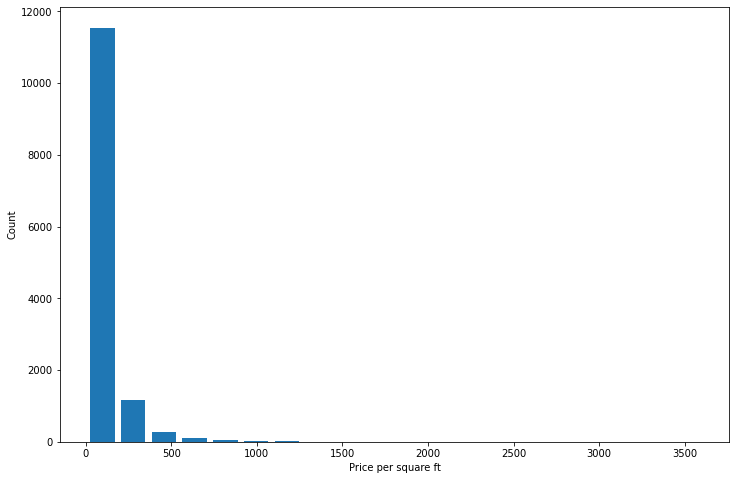

In [32]:
plt.hist(df.price, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

###using log scale can make visualization little better

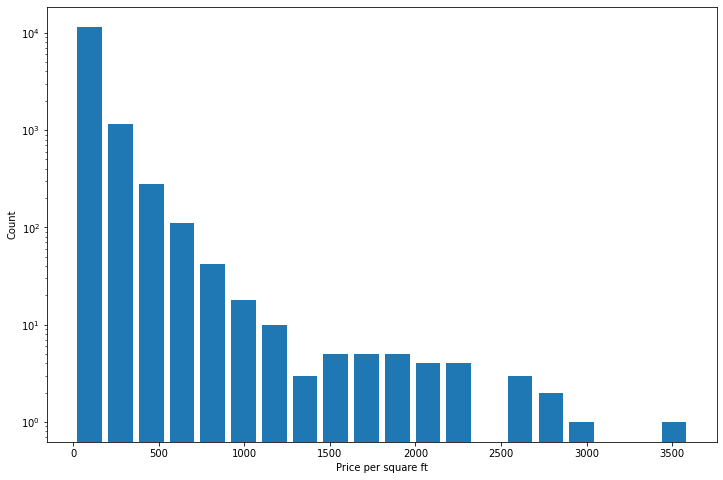

In [33]:
plt.hist(df.price, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least

**(1) Treat outliers using percentile first**

In [34]:
lower_limit, upper_limit = df.price.quantile([0.001, 0.999])
lower_limit, upper_limit

(11.5, 2000.0)

In [35]:
outliers = df[(df.price>upper_limit) | (df.price<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2592,other,4 Bedroom,30000.0,4.0,2100.00,4,7000
598,Malleshwaram,7 BHK,12000.0,7.0,2200.00,7,18333
3144,other,5 BHK,8321.0,5.0,2700.00,5,32448
11832,Attibele,1 BHK,400.0,1.0,10.25,1,2562
8501,Chandapura,1 BHK,450.0,1.0,9.00,1,2000
8560,Doddaballapur,2 Bedroom,640.0,1.0,10.50,2,1640
10422,Yelahanka New Town,1 BHK,284.0,1.0,8.00,1,2816
4119,other,4 Bedroom,7000.0,5.0,2050.00,4,29285
7403,other,1 BHK,470.0,2.0,10.00,1,2127
13081,other,6 Bedroom,8000.0,6.0,2800.00,6,35000


Above shows properties that has price_per_sqft value such as 8 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price value  which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [36]:

df2 = df[(df.price<upper_limit) & (df.price>lower_limit)]
df2.shape

(13169, 7)

In [37]:
df.shape[0] - df2.shape[0]

31

###We removed total 31 outliers

##(2) Now remove outliers using 4 standard deviation

In [38]:
max_limit = df2.price.mean() + 4*df2.price.std()
min_limit = df2.price.mean() - 4*df2.price.std()
max_limit, min_limit

(611.4750936044405, -392.0519718791767)

In [39]:
df2[(df2.price>max_limit) | (df2.price<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1218,other,4 Bedroom,14000.0,3.0,800.0,4,5714
4470,other,3 Bedroom,4470.0,3.0,700.0,3,15659
6946,other,3 BHK,3761.0,3.0,650.0,3,17282
12051,Malleshwaram,5 Bedroom,3000.0,4.0,900.0,5,30000
828,other,3 BHK,3761.0,3.0,660.0,3,17548
4199,other,4 Bedroom,7500.0,4.0,900.0,4,12000
4638,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43,27500
6709,Malleshwaram,4 Bedroom,4000.0,4.0,1100.0,4,27500
12777,other,5 BHK,4000.0,5.0,680.0,5,17000
9251,Ramagondanahalli,5 Bedroom,9600.0,6.0,1800.0,5,18750


In [40]:
df3 = df2[(df2.price>min_limit) & (df2.price<max_limit)]
df3.shape

(13022, 7)

In [41]:
df2.shape[0]-df3.shape[0]

147

### In this step we removed total 147 outliers

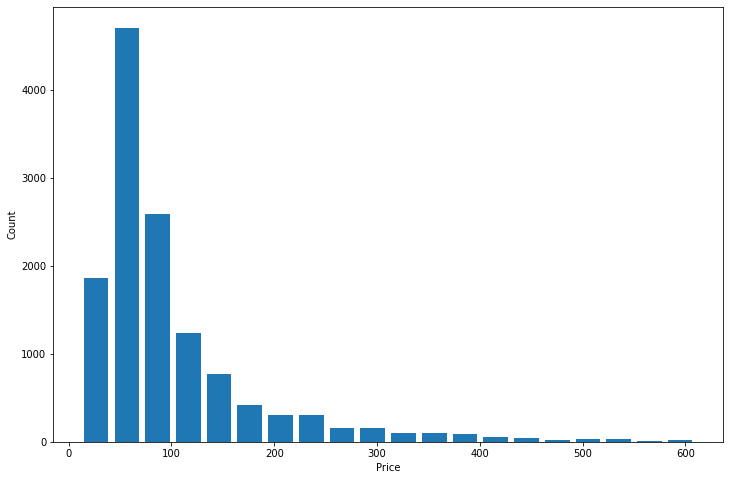

In [46]:
plt.hist(df3.price, bins=20, rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

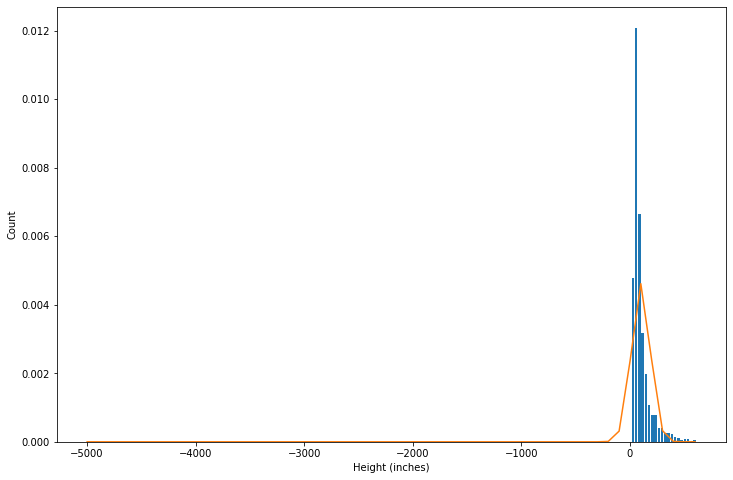

In [47]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price.mean(),df3.price.std()))

##(3) Now remove outliers using z score. Use z score of 4 as your thresold

In [48]:
df2['zscore'] = (df2.price-df2.price.mean())/df2.price.std()
df2.sample(10)

<ipython-input-48-dfc18d844680>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price-df2.price.mean())/df2.price.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
12718,Marathahalli,2 BHK,1196.0,2.0,57.95,2,4845,-0.412637
11530,other,2 BHK,1040.0,2.0,36.40,2,3500,-0.584431
11930,Hennur Road,2 BHK,1232.0,2.0,80.00,2,6493,-0.236857
2860,Mahadevpura,1 BHK,730.0,1.0,35.00,1,4794,-0.595592
8319,6th Phase JP Nagar,2 BHK,1460.0,2.0,80.00,2,5479,-0.236857
9598,Thigalarapalya,3 BHK,1830.0,4.0,150.00,3,8196,0.321175
2036,Panathur,3 BHK,1546.0,3.0,99.00,3,6403,-0.085391
8044,Haralur Road,2 BHK,1243.0,2.0,46.00,2,3700,-0.507901
793,other,3 BHK,1602.0,2.0,75.00,3,4681,-0.276716
1999,Yeshwanthpur,1 BHK,671.0,1.0,36.85,1,5491,-0.580844


In [49]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(147, 8)

In [50]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
12976,other,4 BHK,6652.0,6.0,660.0,4,9921,4.386835
8861,Cunningham Road,5 Bedroom,2925.0,5.0,936.0,5,32000,6.587074
10465,Electronic City,4 Bedroom,1800.0,3.0,700.0,4,38888,4.705710
4544,Marathahalli,4 Bedroom,4000.0,4.0,650.0,4,16250,4.307116
10578,Giri Nagar,4 Bedroom,4000.0,3.0,750.0,4,18750,5.104304


In [51]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13022, 8)

In [52]:
df2.shape[0] - df4.shape[0]

147

147
In this step also we removed 147 outliers. The result would be exactly same as 4 standard deviation